# Experiment IoT-Lab

In [47]:
import json
import os
from datetime import datetime
from appdirs import user_data_dir


timestamp = datetime.now().strftime("%Y%m%d-%H-%M-%S")
duration_h = 2
algo = 'qt'

use_large = True
add_or_remove = False

if algo:
    app_path = f"/Users/dzakyzf/lain/iotlab/openwsniotlab/openwsn-fw/build/iot-lab_M3_armgcc_{algo}/projects/common/03oos_openwsn_prog"
else:
    app_path = "/Users/dzakyzf/lain/iotlab/openwsniotlab/openwsn-fw/build/iot-lab_M3_armgcc/projects/common/03oos_openwsn_prog"

site = "strasbourg"
energy_profile = "energym3"

small_nodes = [1,2,19,20,29,30,47,48,53,54] # 10
small_nodes_root = 29
small_near_root = 30
small_stop_nodes = [47,20]

large_nodes = small_nodes + [5,6,21,22,33,34,49,50,57,58] + [9,10,23,24,37,38,51,52,61,62] # 30
large_nodes_root = 33
large_near_root = 34
large_stop_nodes = [47,20] + [22,49] + [24,51]


stop_nodes = []
if use_large:
    all_nodes = large_nodes
    if add_or_remove:
        stop_nodes = large_stop_nodes
    else:
        nodes = all_nodes
        
    root = large_nodes_root
    near_root = large_near_root
else:
    all_nodes = small_nodes
    if add_or_remove:
        stop_nodes = small_stop_nodes
    else:
        nodes = all_nodes
    root = small_nodes_root
    near_root = small_near_root
nodes = [x for x in all_nodes if x not in stop_nodes]
    

print(all_nodes)
print(nodes)
print(stop_nodes)

[1, 2, 19, 20, 29, 30, 47, 48, 53, 54, 5, 6, 21, 22, 33, 34, 49, 50, 57, 58, 9, 10, 23, 24, 37, 38, 51, 52, 61, 62]
[1, 2, 19, 20, 29, 30, 47, 48, 53, 54, 5, 6, 21, 22, 33, 34, 49, 50, 57, 58, 9, 10, 23, 24, 37, 38, 51, 52, 61, 62]
[]


In [ ]:
# arm-none-eabi-size 03oos_openwsn_prog

# check size
# ROM usage = text = 108.576 kb
# RAM usage = data + bss = 65.532 kb

# file size 1066208 bytes = 1.066208 mb
#    text	   data	    bss	    dec	    hex	filename
#  108576	     28	  65504	 174108	  2a81c	03oos_openwsn_prog

In [48]:
file_name = 'exp_log'
def get_log_path(file_name="x", format="txt", folder_only=False):
    if folder_only:
        return user_data_dir('openvisualizer')
    else:
        return os.path.join(user_data_dir('openvisualizer'), file_name+"."+format)

def run_command(cmd):
    print(cmd)
    val = !{cmd}
    val = [str(i).strip() for i in val]
    result = json.loads("".join(val))
    return result

def nodes2list(nodes):
    return "+".join([str(x) for x in nodes])

### Submit experimet

In [49]:
# Submit experiment
cmd = f"iotlab-experiment submit -n test_{algo}_{'large' if use_large else 'small'}_{timestamp} -d {int(duration_h*60)} -l {site},m3,{nodes2list(all_nodes)},,{energy_profile}"
print(cmd)

iotlab-experiment submit -n test_qt_large_20230113-07-37-53 -d 120 -l strasbourg,m3,1+2+19+20+29+30+47+48+53+54+5+6+21+22+33+34+49+50+57+58+9+10+23+24+37+38+51+52+61+62,,energym3


In [50]:
result = run_command(cmd)
exp_id = result["id"]
exp_id

iotlab-experiment submit -n test_qt_large_20230113-07-37-53 -d 120 -l strasbourg,m3,1+2+19+20+29+30+47+48+53+54+5+6+21+22+33+34+49+50+57+58+9+10+23+24+37+38+51+52+61+62,,energym3


353055

In [51]:
!iotlab-experiment wait

Waiting that experiment 353055 gets in state Running
"Running"


### Flash motes

In [52]:
app_path

'/Users/dzakyzf/lain/iotlab/openwsniotlab/openwsn-fw/build/iot-lab_M3_armgcc_qt/projects/common/03oos_openwsn_prog'

In [45]:
cmd = f'iotlab-node --flash-idle -l {site},m3,{nodes2list(nodes)}'
run_command(cmd)

cmd = f"iotlab-node --reset -l {site},m3,{nodes2list(nodes)}"
result = run_command(cmd)

iotlab-node --flash-idle -l strasbourg,m3,1+2+19+20+29+30+47+48+53+54+5+6+21+22+33+34+49+50+57+58+9+10+23+24+37+38+51+52+61+62
iotlab-node --reset -l strasbourg,m3,1+2+19+20+29+30+47+48+53+54+5+6+21+22+33+34+49+50+57+58+9+10+23+24+37+38+51+52+61+62


{'0': ['m3-1.strasbourg.iot-lab.info',
  'm3-2.strasbourg.iot-lab.info',
  'm3-5.strasbourg.iot-lab.info',
  'm3-6.strasbourg.iot-lab.info',
  'm3-9.strasbourg.iot-lab.info',
  'm3-10.strasbourg.iot-lab.info',
  'm3-19.strasbourg.iot-lab.info',
  'm3-21.strasbourg.iot-lab.info',
  'm3-23.strasbourg.iot-lab.info',
  'm3-29.strasbourg.iot-lab.info',
  'm3-30.strasbourg.iot-lab.info',
  'm3-33.strasbourg.iot-lab.info',
  'm3-34.strasbourg.iot-lab.info',
  'm3-37.strasbourg.iot-lab.info',
  'm3-38.strasbourg.iot-lab.info',
  'm3-48.strasbourg.iot-lab.info',
  'm3-50.strasbourg.iot-lab.info',
  'm3-52.strasbourg.iot-lab.info',
  'm3-53.strasbourg.iot-lab.info',
  'm3-54.strasbourg.iot-lab.info',
  'm3-57.strasbourg.iot-lab.info',
  'm3-58.strasbourg.iot-lab.info',
  'm3-61.strasbourg.iot-lab.info',
  'm3-62.strasbourg.iot-lab.info'],
 '1': ['m3-20.strasbourg.iot-lab.info',
  'm3-22.strasbourg.iot-lab.info',
  'm3-24.strasbourg.iot-lab.info',
  'm3-47.strasbourg.iot-lab.info',
  'm3-49.stras

In [59]:
cmd = f'iotlab-node --flash {app_path} -l {site},m3,{nodes2list(nodes)}'
run_command(cmd)

cmd = f'iotlab-node --reset -l {site},m3,{nodes2list(nodes)}'
result = run_command(cmd)

iotlab-node --flash /Users/dzakyzf/lain/iotlab/openwsniotlab/openwsn-fw/build/iot-lab_M3_armgcc_qt/projects/common/03oos_openwsn_prog -l strasbourg,m3,1+2+19+20+29+30+47+48+53+54+5+6+21+22+33+34+49+50+57+58+9+10+23+24+37+38+51+52+61+62
iotlab-node --reset -l strasbourg,m3,1+2+19+20+29+30+47+48+53+54+5+6+21+22+33+34+49+50+57+58+9+10+23+24+37+38+51+52+61+62


### Simulate Add
    # Stop
    # after half time
    # Start

### Simulate Remove
    # afer half time
    # Stop


In [34]:
# Stop
if add_or_remove:
    cmd = f"iotlab-node --flash-idle -l {site},m3,{nodes2list(stop_nodes)}"
    run_command(cmd)

    cmd = f'iotlab-node --reset -l {site},m3,{nodes2list(stop_nodes)}'
    result = run_command(cmd)

    cmd = f'iotlab-node --stop -l {site},m3,{nodes2list(stop_nodes)}'
    result = run_command(cmd)

iotlab-node --flash-idle -l strasbourg,m3,47+20+22+49+24+51
iotlab-node --reset -l strasbourg,m3,47+20+22+49+24+51
iotlab-node --stop -l strasbourg,m3,47+20+22+49+24+51


In [31]:
# Start
# Add at 5:32 PM
if add_or_remove:
    cmd = f'iotlab-node --flash {app_path} -l {site},m3,{nodes2list(stop_nodes)}'
    run_command(cmd)

    cmd = f"iotlab-node --reset -l {site},m3,{nodes2list(stop_nodes)}"
    run_command(cmd)

iotlab-node --flash /Users/dzakyzf/lain/iotlab/openwsniotlab/openwsn-fw/build/iot-lab_M3_armgcc_qt/projects/common/03oos_openwsn_prog -l strasbourg,m3,47+20+22+49+24+51
iotlab-node --reset -l strasbourg,m3,47+20+22+49+24+51


### Run openvisualizer

In [57]:
node_site_list = [f'm3-{id_}.{site}.iot-lab.info' for id_ in nodes]
cmd = f"openv-server --iotlab-motes {' '.join(node_site_list)}"
print(len(nodes))
print(cmd)

30
openv-server --iotlab-motes m3-1.strasbourg.iot-lab.info m3-2.strasbourg.iot-lab.info m3-19.strasbourg.iot-lab.info m3-20.strasbourg.iot-lab.info m3-29.strasbourg.iot-lab.info m3-30.strasbourg.iot-lab.info m3-47.strasbourg.iot-lab.info m3-48.strasbourg.iot-lab.info m3-53.strasbourg.iot-lab.info m3-54.strasbourg.iot-lab.info m3-5.strasbourg.iot-lab.info m3-6.strasbourg.iot-lab.info m3-21.strasbourg.iot-lab.info m3-22.strasbourg.iot-lab.info m3-33.strasbourg.iot-lab.info m3-34.strasbourg.iot-lab.info m3-49.strasbourg.iot-lab.info m3-50.strasbourg.iot-lab.info m3-57.strasbourg.iot-lab.info m3-58.strasbourg.iot-lab.info m3-9.strasbourg.iot-lab.info m3-10.strasbourg.iot-lab.info m3-23.strasbourg.iot-lab.info m3-24.strasbourg.iot-lab.info m3-37.strasbourg.iot-lab.info m3-38.strasbourg.iot-lab.info m3-51.strasbourg.iot-lab.info m3-52.strasbourg.iot-lab.info m3-61.strasbourg.iot-lab.info m3-62.strasbourg.iot-lab.info


In [58]:
root_site = f"m3-{root}.{site}.iot-lab.info"
cmd = f"openv-client root {root_site}"
print(cmd)

openv-client root m3-33.strasbourg.iot-lab.info


# Plot Energy

In [80]:
# download oml energy
exp_id = 352894
oml_path = get_log_path(folder_only=True)
cmd = f"scp -r -i ~/.ssh/id_rsa dfawwaz@{site}.iot-lab.info:/senslab/users/dfawwaz/.iot-lab/{exp_id}/consumption/ ."
cmd

'scp -r -i ~/.ssh/id_rsa dfawwaz@paris.iot-lab.info:/senslab/users/dfawwaz/.iot-lab/352894/consumption/ .'

In [1]:
import sys

import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join(''))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from oml_plot_tools import consum
from oml_plot_tools import common


/Users/dzakyzf/lain/iotlab/notebook


In [3]:
# Selection variables
_POWER = 'power'
_VOLTAGE = 'voltage'
_CURRENT = 'current'
_ALL = 'all'
_TIME = 'time'
_TITLE = 'Node'


MEASURES_D = common.measures_dict(
    (_POWER, float, 'Power (W)'),
    (_VOLTAGE, float, 'Voltage (V)'),
    (_CURRENT, float, 'Current (A)'),
)


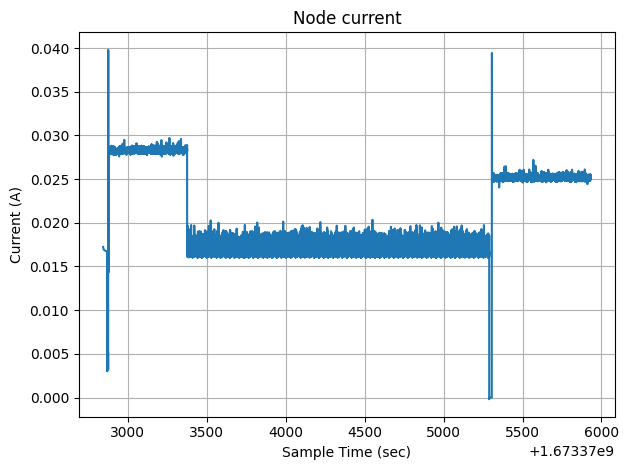

In [4]:
path = 'consumption/m3_1.oml'

data = consum.oml_load(path)
data = data[0:-1]

consum.consumption_plot(data, _TITLE, _CURRENT)

In [6]:
import pandas as pd
import numpy as np
import glob

In [7]:
df = pd.DataFrame(data, columns=data.dtype.names)
df

,timestamp,type,num,t_s,t_us,power,voltage,current
0,1.673373e+09,consumption,1,1673372843,219156,0.055817,3.24250,0.017236
1,1.673373e+09,consumption,2,1673372843,284090,0.055817,3.24250,0.017221
2,1.673373e+09,consumption,3,1673372843,349024,0.055817,3.24125,0.017212
3,1.673373e+09,consumption,4,1673372843,413988,0.055817,3.24125,0.017202
4,1.673373e+09,consumption,5,1673372843,478922,0.055695,3.24250,0.017187
...,...,...,...,...,...,...,...,...
47536,1.673376e+09,consumption,47537,1673375930,723326,0.081344,3.23750,0.025121
47537,1.673376e+09,consumption,47538,1673375930,788260,0.081710,3.23875,0.025209
47538,1.673376e+09,consumption,47539,1673375930,853225,0.081466,3.23875,0.025146
47539,1.673376e+09,consumption,47540,1673375930,918189,0.080611,3.23750,0.024882


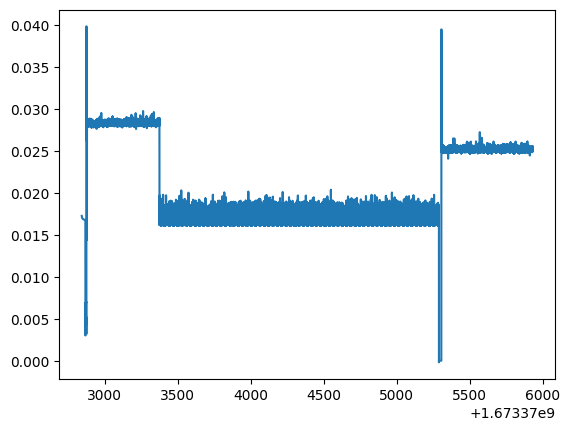

In [8]:
x, y = df[['timestamp','current']].values.T

plt.plot(x, y)

In [10]:
currents = []
for path in glob.glob(os.path.join("consumption", '*.oml')):
    data = consum.oml_load(path)
    data = data[0:-1]
    df = pd.DataFrame(data, columns=data.dtype.names)
    timestamp, current = df[['timestamp','current']].values.T
    currents.extend(current)

In [11]:
np.mean(currents) # mAs

0.01892486574445936

# Compute KPI IoT Lab

In [47]:
from scipy import stats as st
import os
import json
from appdirs import user_data_dir
from varname import nameof
from datetime import datetime
import numpy as np
from scipy import stats as st
from scipy.stats import skew, kurtosis

file_name = 'exp_log_20230112-05-03-10'
# file_name = 'exp_log'
output_name = 'exp_kpi'
time_format = "%H:%M:%S.%f"

def get_log_path(file_name, format="txt"):
    return os.path.join(user_data_dir('openvisualizer'), file_name+"."+format)

def openfile(func):
    def inner(inputfile):
        with open(inputfile, 'r') as f:
            return func(f)
    return inner

def parse_time(time_s):
    return datetime.strptime(time_s, time_format)

def generate_stats(val):
    return {
        'count': (
            len(val)
            if val else 'N/A'
        ),
        'sum': (
            sum(val)
            if val else 'N/A'
        ),
        'min': (
            np.min(val)
            if val else 'N/A'
        ),
        'max': (
            np.max(val)
            if val else 'N/A'
        ),
        'mean': (
            np.mean(val)
            if val else 'N/A'
        ),
        'median': (
            np.median(val)
            if val else 'N/A'
        ),
        '75%': (
            np.percentile(val, 75)
            if val else 'N/A'
        ),
        '95%': (
            np.percentile(val, 95)
            if val else 'N/A'
        ),
        'std': (
            np.std(val)
            if val else 'N/A'
        ),
        'var': (
            np.var(val)
            if val else 'N/A'
        ),
        'skew': (
            skew(val)
            if val else 'N/A'
        ),
        'kurtosis': (
            kurtosis(val)
            if val else 'N/A'
        ),
    }

@openfile
def kpis_all(inputfile):
    allstats = {
        "start_root": None,
        "motes": {}
    }

    for line in inputfile:
        logline = json.loads(line)
        time = logline['time']
        time = parse_time(time)
        state = logline['0_state']

        mote_id = None
        if "mote_id" in logline:
            mote_id = logline['mote_id']
            mote_id = hex(mote_id)[2:]

        if state == 'root' and allstats["start_root"] is None:
            allstats["start_root"] = time
    
        if state == 'join' and allstats["start_root"]:
            join_at = time
            join_time = max((join_at - allstats["start_root"]).total_seconds(), 0)
                
            if mote_id not in allstats['motes']:
                allstats['motes'][mote_id] = {'mote_join_time': None}
            
            if allstats['motes'][mote_id]["mote_join_time"] is None:        
                allstats['motes'][mote_id]["mote_join_time"] = join_time / 60
        
        if state == 'trickle':
            Nstate = logline['Nstates']

            # pkt pf
            if "trickle" not in allstats['motes'][mote_id]:
                allstats['motes'][mote_id]["trickle"] = {}

            if Nstate not in allstats['motes'][mote_id]["trickle"]:
                allstats['motes'][mote_id]["trickle"][Nstate] = {}
            
            temp = logline
            del temp['0_state']
            del temp['Nstates']
            del temp['mote_id']
            del temp['time']

            for key in logline.keys():
                allstats['motes'][mote_id]["trickle"][Nstate][key] = logline[key]


        if state == 'send':
            counter = logline["counter"]

            # keep update to get the last
            allstats['motes'][mote_id]["mote_ambr"] = logline["ambr"]
            
            if mote_id not in allstats['motes']:
                allstats['motes'][mote_id] = {}
            
            if "mote_total_fail" not in allstats['motes'][mote_id]:
                allstats['motes'][mote_id]["mote_total_fail"] = 0
            
            if logline["is_failed"]:
                allstats['motes'][mote_id]["mote_total_fail"] += 1

            # pkt time
            if "packets" not in allstats['motes'][mote_id]:
                allstats['motes'][mote_id]["packets"] = {}

            if counter not in allstats['motes'][mote_id]["packets"]:
                allstats['motes'][mote_id]["packets"][counter] = {}
            
            allstats['motes'][mote_id]["packets"][counter]["send_time"] = time

        if state == 'receive':
            counter = logline["counter"]
            
            if mote_id not in allstats['motes']:
                allstats['motes'][mote_id] = {}

            # pkt time
            if "packets" not in allstats['motes'][mote_id]:
                allstats['motes'][mote_id]["packets"] = {}

            if counter not in allstats['motes'][mote_id]["packets"]:
                allstats['motes'][mote_id]["packets"][counter] = {}
            
            allstats['motes'][mote_id]["packets"][counter]["receive_time"] = time
        
        if state == 'receive' or state == 'send':
            counter = logline["counter"]

            if (
                'send_time' in allstats['motes'][mote_id]["packets"][counter] and
                'receive_time' in allstats['motes'][mote_id]["packets"][counter]
            ):
                send_ = allstats['motes'][mote_id]["packets"][counter]['send_time']
                receive_ = allstats['motes'][mote_id]["packets"][counter]['receive_time']

                diff = max((receive_ - send_).total_seconds(), 0)
                allstats['motes'][mote_id]["packets"][counter]["pkt_latency"] = diff

    del allstats['start_root']
    all_motes_data = {}

    for mote_id in allstats['motes'].keys():
        # calculate latency
        latencies = []
        for pkt in allstats['motes'][mote_id]['packets'].keys():
            if 'pkt_latency' in allstats['motes'][mote_id]['packets'][pkt]:
                pkt_latency = allstats['motes'][mote_id]['packets'][pkt]["pkt_latency"]
                latencies.append(pkt_latency)

            if 'send_time' in allstats['motes'][mote_id]['packets'][pkt]:
                # mote level 
                if "mote_total_send" not in allstats['motes'][mote_id]:
                    allstats['motes'][mote_id]["mote_total_send"] = 0
                allstats['motes'][mote_id]["mote_total_send"] += 1
                
                if 'receive_time' in allstats['motes'][mote_id]['packets'][pkt]:
                    # mote level 
                    if "mote_total_receive" not in allstats['motes'][mote_id]:
                        allstats['motes'][mote_id]["mote_total_receive"] = 0
                    allstats['motes'][mote_id]["mote_total_receive"] += 1

        del allstats['motes'][mote_id]['packets']

        if len(latencies) > 0:
            allstats['motes'][mote_id]["mote_min_latency"] = np.min(latencies)
            allstats['motes'][mote_id]["mote_max_latency"] = np.max(latencies)
            allstats['motes'][mote_id]["mote_avg_latency"] = np.mean(latencies)

        # calculate mote pdr
        mote_total_send = None
        mote_total_receive = None
        if 'mote_total_send' in allstats['motes'][mote_id] and 'mote_total_receive' in allstats['motes'][mote_id]:
            mote_total_send = allstats['motes'][mote_id]["mote_total_send"]
            mote_total_receive = allstats['motes'][mote_id]["mote_total_receive"]
            if mote_total_send > 0 and mote_total_receive > 0:
                allstats['motes'][mote_id]["mote_pdr"] = allstats['motes'][mote_id]["mote_total_receive"] / allstats['motes'][mote_id]["mote_total_send"]

        # get ambr
        ambr = None
        if 'mote_ambr' in allstats['motes'][mote_id]:
            ambr = allstats['motes'][mote_id]["mote_ambr"]

        join_time = None
        if 'mote_join_time' in allstats['motes'][mote_id]:
            join_time = allstats['motes'][mote_id]["mote_join_time"]

        total_states = None
        if 'trickle' in allstats['motes'][mote_id]:
            total_states = len(allstats['motes'][mote_id]['trickle'])
            allstats['motes'][mote_id]["mote_trickle_states"] = total_states

            for trickle_state in allstats['motes'][mote_id]['trickle'].keys():
                for param in allstats['motes'][mote_id]['trickle'][trickle_state].keys():
                    value = float(allstats['motes'][mote_id]['trickle'][trickle_state][param])
                    key = "trickle_"+param
                    if key not in all_motes_data:
                        all_motes_data[key] = []
                    
                    all_motes_data[key].append(value)
        
        # gather mote data for global stats
        if 'latency' not in all_motes_data:
            all_motes_data['latency'] = []
        if 'pdr' not in all_motes_data:
            all_motes_data['pdr'] = {'send': 0, 'receive': 0}
        if 'ambr' not in all_motes_data:
            all_motes_data['ambr'] = []
        if 'join_time' not in all_motes_data:
            all_motes_data['join_time'] = []
        if 'total_states' not in all_motes_data:
            all_motes_data['total_states'] = []

        if latencies: all_motes_data['latency'].extend(latencies)
        if mote_total_send and mote_total_receive:
            all_motes_data['pdr']['send'] += mote_total_send
            all_motes_data['pdr']['receive'] += mote_total_receive

        if ambr: all_motes_data['ambr'].append(ambr)
        if join_time: all_motes_data['join_time'].append(join_time)
        if total_states: all_motes_data['total_states'].append(total_states)

    # calculate mote latency stat
    for key in all_motes_data.keys():
        if key == 'pdr':
            allstats["global_"+key]  = all_motes_data[key]['receive'] / all_motes_data[key]['send']
            continue

        allstats["global_"+key] = generate_stats(all_motes_data[key])
    

    allstats["global_total_motes"] = len(allstats['motes']) + 1

    return allstats

filepath = get_log_path(file_name)
kpis = kpis_all(filepath)

output = get_log_path(output_name, "json")
with open(output, 'w') as f:
    f.write(json.dumps(kpis, indent=4, sort_keys=True, default=str))

In [13]:
# Get mapping id
# cmd = 'iotlab-status --nodes --archi m3 --site strasbourg'
# result = run_command(cmd)

# for mote in result['items']:
#     map_motes = {}
#     map_motes['network_address'] = mote['network_address']
#     map_motes['uid'] = mote['uid']

iotlab-status --nodes --archi m3 --site strasbourg
